Prueba

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8248\1502407153.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['Tiempo'] = pd.date_range(start='2023-01-01', periods=len(df), freq='T')  # Ajusta 'start' y 'freq' según sea necesario


    Consumo_T  Consumo_Refrigerador_Pred  Consumo_Ventilador_Pred
0    0.718932                   0.393449                 0.325483
1    0.910594                   0.612428                 0.298167
2    0.251277                   0.033604                 0.217672
3    0.360938                   0.048270                 0.312668
4    0.414158                   0.059642                 0.339021
..        ...                        ...                      ...
95   0.797060                   0.398568                 0.329718
96   0.517260                   0.059642                 0.339021
97   0.496270                   0.059642                 0.339021
98   0.769274                   0.398568                 0.329718
99   0.997353                   0.670778                 0.326575

[100 rows x 3 columns]


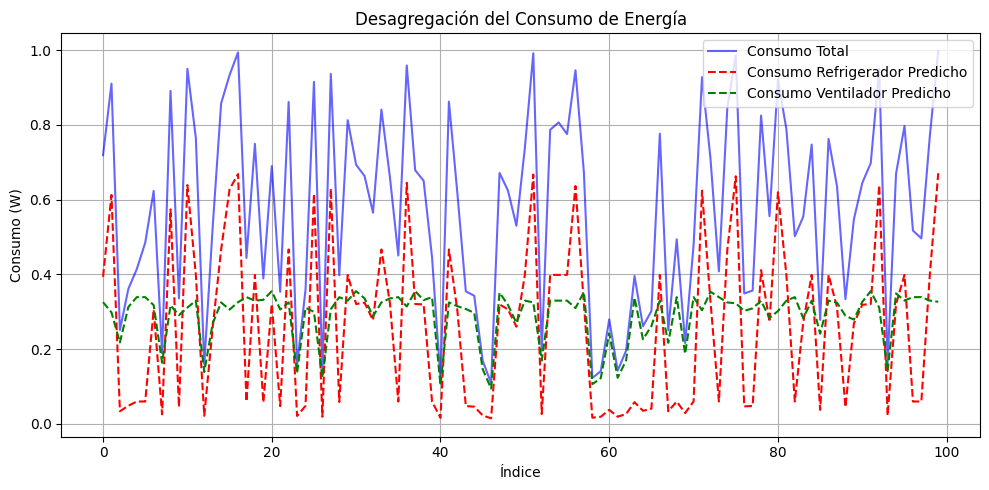

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib
import matplotlib.pyplot as plt

# Cargar datos reales desde un archivo CSV
df = pd.read_csv('datos.csv')

# Generar una columna de tiempo desde el primer hasta el último dato
df['Tiempo'] = pd.date_range(start='2023-01-01', periods=len(df), freq='T')  # Ajusta 'start' y 'freq' según sea necesario

# Preparar los datos para el modelo
X = df[['Consumo_T']]
y_refrigerador = df['Corriente_R']
y_ventilador = df['Corriente_V']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_refrigerador, y_test_refrigerador = train_test_split(X, y_refrigerador, test_size=0.2, random_state=42)
X_train, X_test, y_train_ventilador, y_test_ventilador = train_test_split(X, y_ventilador, test_size=0.2, random_state=42)

# Crear y entrenar el modelo para el refrigerador
model_refrigerador = RandomForestRegressor(n_estimators=100, random_state=42)
model_refrigerador.fit(X_train, y_train_refrigerador)

# Crear y entrenar el modelo para el ventilador
model_ventilador = RandomForestRegressor(n_estimators=100, random_state=42)
model_ventilador.fit(X_train, y_train_ventilador)

# Guardar los modelos entrenados
joblib.dump(model_refrigerador, 'modelo_refrigerador.pkl')
joblib.dump(model_ventilador, 'modelo_ventilador.pkl')

# 2. Desagregar consumo de nuevos datos
def desagregar_consumo(nuevos_datos):
    # Cargar modelos entrenados
    model_refrigerador = joblib.load('modelo_refrigerador.pkl')
    model_ventilador = joblib.load('modelo_ventilador.pkl')

    # Realizar predicciones utilizando el consumo total
    predicciones_refrigerador = model_refrigerador.predict(nuevos_datos[['Consumo_T']])
    predicciones_ventilador = model_ventilador.predict(nuevos_datos[['Consumo_T']])

    # Ajustar las predicciones para que sumen a 'Consumo_Total' (puedes necesitar adaptar esto)
    predictions_total = predicciones_refrigerador + predicciones_ventilador
    scaling_factor = np.where(predictions_total > nuevos_datos['Consumo_T'], 
                              nuevos_datos['Consumo_T'] / predictions_total, 1.0)

    predicciones_refrigerador_ajustadas = predicciones_refrigerador * scaling_factor
    predicciones_ventilador_ajustadas = predicciones_ventilador * scaling_factor

    # Agregar las predicciones ajustadas al DataFrame
    nuevos_datos['Consumo_Refrigerador_Pred'] = predicciones_refrigerador_ajustadas
    nuevos_datos['Consumo_Ventilador_Pred'] = predicciones_ventilador_ajustadas

    return nuevos_datos

# Crear un nuevo DataFrame con datos generales (puedes omitir la columna de tiempo)
df_nuevo = pd.DataFrame({
    'Consumo_T': np.random.uniform(low=0.1, high=1, size=100)  # Sustituir por datos reales
})

# Desagregar los nuevos datos
resultados = desagregar_consumo(df_nuevo)

# Mostrar resultados
print(resultados[['Consumo_T', 'Consumo_Refrigerador_Pred', 'Consumo_Ventilador_Pred']])

# Guardar los resultados en un nuevo archivo CSV
resultados.to_csv('resultados_desagregados.csv', index=False)

# 3. Graficar los resultados de la desagregación (sin columna de tiempo)
plt.figure(figsize=(10, 5))
plt.plot(resultados['Consumo_T'], label='Consumo Total', color='blue', alpha=0.6)
plt.plot(resultados['Consumo_Refrigerador_Pred'], label='Consumo Refrigerador Predicho', color='red', linestyle='--')
plt.plot(resultados['Consumo_Ventilador_Pred'], label='Consumo Ventilador Predicho', color='green', linestyle='--')

plt.title('Desagregación del Consumo de Energía')
plt.xlabel('Índice')
plt.ylabel('Consumo (W)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Index(['fecha', 'Consumo_T'], dtype='object')
                    fecha  Consumo_T  Consumo_Refrigerador_Pred  \
0     2024-09-25 15:00:01   0.937698                   0.630656   
1     2024-09-25 15:00:01   0.937238                   0.630347   
2     2024-09-25 15:00:02   0.937238                   0.630347   
3     2024-09-25 15:00:03   0.938015                   0.630870   
4     2024-09-25 15:00:04   0.937945                   0.630822   
...                   ...        ...                        ...   
7457  2024-09-25 16:41:07   0.338452                   0.045263   
7458  2024-09-25 16:41:08   0.336604                   0.045015   
7459  2024-09-25 16:41:08   0.338325                   0.045246   
7460  2024-09-25 16:41:09   0.338325                   0.045246   
7461  2024-09-25 16:41:10   0.337913                   0.045190   

      Consumo_Ventilador_Pred  
0                    0.307041  
1                    0.306891  
2                    0.306891  
3                    

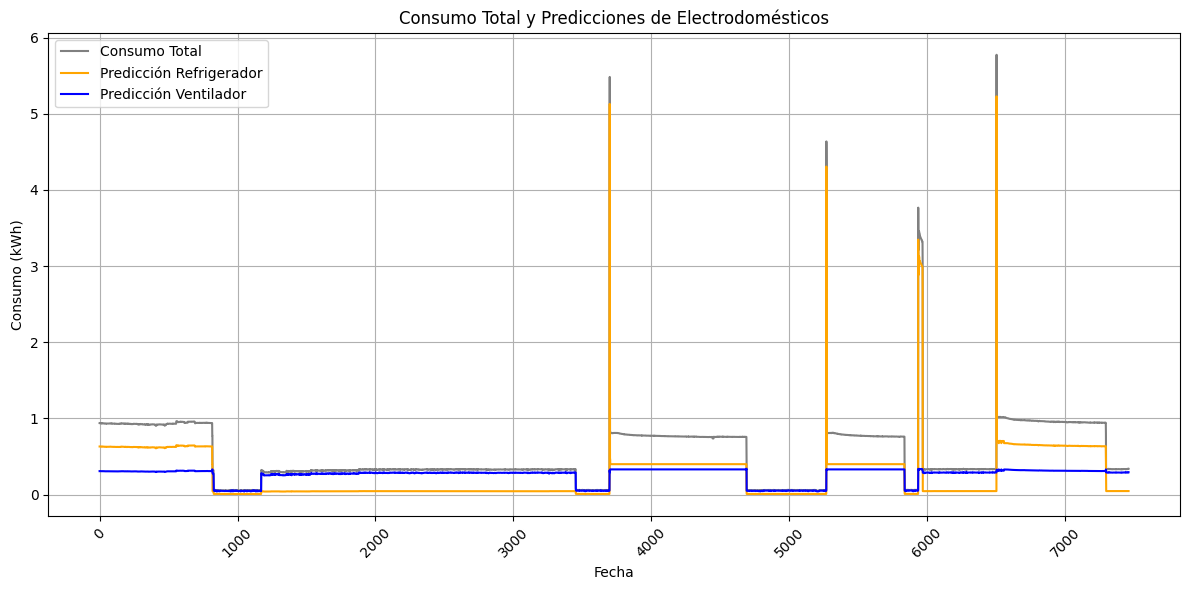

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt  # Importar matplotlib para graficar

# 1. Cargar los nuevos datos desde un archivo CSV
nuevos_datos = pd.read_csv('datos_generales.csv')  # Asegúrate de que la ruta sea correcta

# 2. Verificar las columnas de nuevos_datos
print(nuevos_datos.columns)  # Esto te ayudará a entender qué columnas están disponibles

# Desagregar consumo usando la función que definiste
def desagregar_consumo(nuevos_datos):
    # Cargar modelos entrenados
    model_refrigerador = joblib.load('modelo_refrigerador.pkl')
    model_ventilador = joblib.load('modelo_ventilador.pkl')

    # Realizar predicciones utilizando el consumo total
    predicciones_refrigerador = model_refrigerador.predict(nuevos_datos[['Consumo_T']])
    predicciones_ventilador = model_ventilador.predict(nuevos_datos[['Consumo_T']])

    # Ajustar las predicciones para que sumen a 'Consumo_T'
    predictions_total = predicciones_refrigerador + predicciones_ventilador
    scaling_factor = np.where(predictions_total > nuevos_datos['Consumo_T'], 
                              nuevos_datos['Consumo_T'] / predictions_total, 1.0)

    predicciones_refrigerador_ajustadas = predicciones_refrigerador * scaling_factor
    predicciones_ventilador_ajustadas = predicciones_ventilador * scaling_factor

    # Agregar las predicciones ajustadas al DataFrame
    nuevos_datos['Consumo_Refrigerador_Pred'] = predicciones_refrigerador_ajustadas
    nuevos_datos['Consumo_Ventilador_Pred'] = predicciones_ventilador_ajustadas

    return nuevos_datos

# Desagregar los nuevos datos
resultados = desagregar_consumo(nuevos_datos)

# 3. Mostrar resultados (asegúrate de que la columna 'fecha' está en los datos cargados)
if 'fecha' in resultados.columns:
    print(resultados[['fecha', 'Consumo_T', 'Consumo_Refrigerador_Pred', 'Consumo_Ventilador_Pred']])
else:
    print(resultados[['Consumo_T', 'Consumo_Refrigerador_Pred', 'Consumo_Ventilador_Pred']])

# Graficar los resultados
plt.figure(figsize=(12, 6))
if 'fecha' in resultados.columns:
    plt.plot(resultados.index, resultados['Consumo_T'], label='Consumo Total', color='gray')
    plt.plot(resultados.index, resultados['Consumo_Refrigerador_Pred'], label='Predicción Refrigerador', color='orange')
    plt.plot(resultados.index, resultados['Consumo_Ventilador_Pred'], label='Predicción Ventilador', color='blue')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
    plt.xlabel('Fecha')
else:
    plt.plot(resultados.index, resultados['Consumo_T'], label='Consumo Total', color='gray')
    plt.plot(resultados.index, resultados['Consumo_Refrigerador_Pred'], label='Predicción Refrigerador', color='orange')
    plt.plot(resultados.index, resultados['Consumo_Ventilador_Pred'], label='Predicción Ventilador', color='blue')

plt.title('Consumo Total y Predicciones de Electrodomésticos')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.grid()
plt.show()

# Guardar los resultados en un nuevo archivo CSV
resultados.to_csv('resultados_desagregados.csv', index=False)
